In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. How many features are there and what are they?
2. Show basic statistics of the fetures - both numerical and categorical.
3. What are the days? (Bar chart)
4. What are the times? (Bar chart)
5. What are the sexes? (Pie - % with 0 decimal place)
6. What are the smokers? (Donut - % with 0 decimal place)
7. What is the min, max, average values of total bills? Are there any outliers?
8. What is the min, max, average values of tips? Are there any outliers?
9. Show the customer with max total bill. What are other features of that customer?
10. Show the customer with max tip. What are other features of that customer?
11. What gender has higher footfalls on weekends?
12. What gender has higher footfalls on weekdays?
13. List top ten tippers.
14. List top five tippers on weekends.
15. Who are the generous tippers? - A smoker or a non-smoker? 
16. Who are the generous tippers? - A male or a female?
17. List top five female tippers. How many of them were smokers?
18. List top five male tippers. What did they have - Lunch/Dinner?L
19. Create a new column - 'tip%'. It will contain the values of tips w.r.t total bills.
20. Who came with larger party sizes - males or females?
21. Who came with larger party sizes - smokers or non-smokers?
22. What is the maximum tip given by a non-smoker female? 
23. What is the maximum tip given by a smoker male?
24. List top five customers who has highest tip-to-bill ratio.
25. Show distributions of total bill and tips. What conclusion can be drawn from it?

In [3]:
pd.read_csv(r'tips.csv')

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1. How many features are there and what are they?

In [4]:
df = pd.read_csv(r'tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


2. Show basic statistics of the fetures - both numerical and categorical.

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


3. What are the days? (Bar chart)

In [6]:
df1 = df.day.value_counts()
df1

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

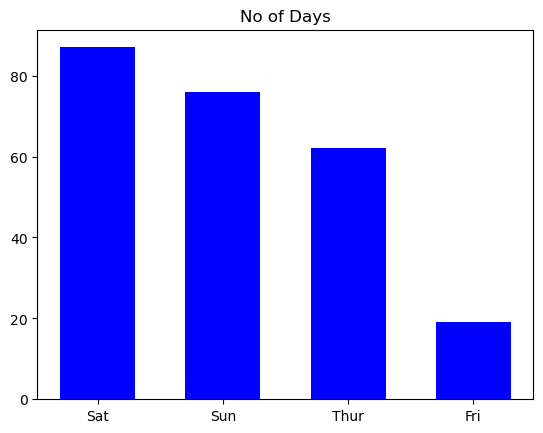

In [7]:
plt.figure()
plt.title("No of Days")
plt.bar(df1.index,df1.values,width=0.6,color="b")
plt.show()

What are the times? (Bar chart)

In [8]:
df2 = df.time.value_counts()
df2

time
Dinner    176
Lunch      68
Name: count, dtype: int64

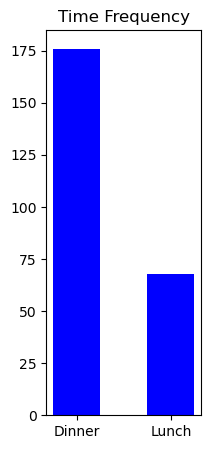

In [9]:
plt.figure(figsize=(2,5))
plt.title("Time Frequency")
plt.bar(df2.index,df2.values,width=0.5,color="b")
plt.show()

5. What are the sexes? (Pie - % with 0 decimal place)

In [10]:
df3 = df.sex.value_counts()
df3

sex
Male      157
Female     87
Name: count, dtype: int64

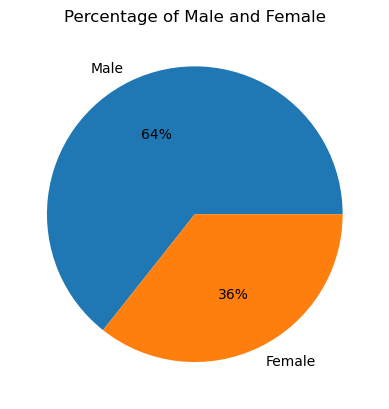

In [11]:
plt.figure()
plt.title("Percentage of Male and Female")
plt.pie(df3, labels = df3.index, explode = [0,0], autopct = '%0.0f%%')
plt.show()

6. What are the smokers? (Donut - % with 0 decimal place)

In [12]:
df4 = df.smoker.value_counts()
df4

smoker
No     151
Yes     93
Name: count, dtype: int64

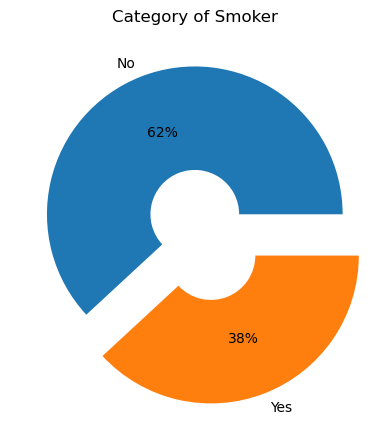

In [13]:
plt.figure()
plt.title("Category of Smoker")
plt.pie(df4, labels = df4.index, explode = [0,0.3], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

7. What is the min, max, average values of total bills? Are there any outliers?

In [14]:
di = df.describe()
di.iloc[[3,-1,1],[0]]

,total_bill
min,3.070000
max,50.810000
mean,19.785943


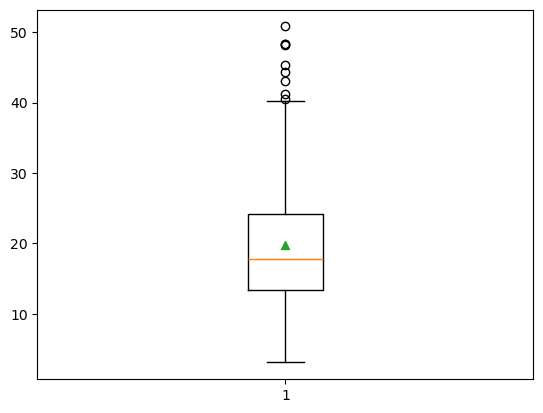

In [15]:
plt.figure()
plt.boxplot(df.total_bill,showmeans = True)
plt.show()

8. What is the min, max, average values of tips? Are there any outliers?

In [16]:
di.iloc[[3,-1,1],[1]]

,tip
min,1.000000
max,10.000000
mean,2.998279


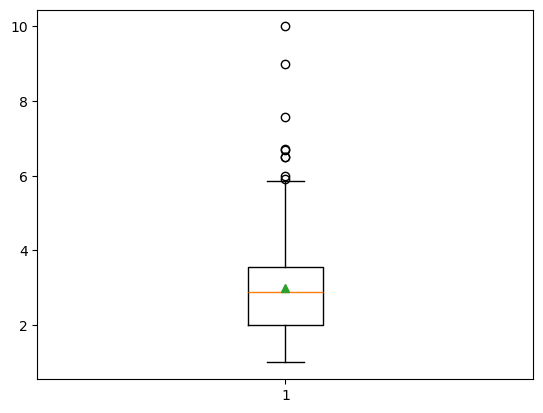

In [17]:
plt.figure()
plt.boxplot(df.tip,showmeans = True)
plt.show()

9. Show the customer with max total bill. What are other features of that customer?

In [18]:
m = df['total_bill'].max()
df[df['total_bill'] == m]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [19]:
df.sort_values(by=['total_bill']).iloc[[-1]]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


10. Show the customer with max tip. What are other features of that customer?

In [20]:
df.sort_values(by=['tip']).iloc[[-1]]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


11. What gender has higher footfalls on weekends?

In [21]:
fdf = df[(df["day"] == "Sun") | (df["day"] == "Sat")]
print(fdf[["day","sex"]].value_counts())
sp = fdf["sex"].value_counts()

day  sex   
Sat  Male      59
Sun  Male      58
Sat  Female    28
Sun  Female    18
Name: count, dtype: int64


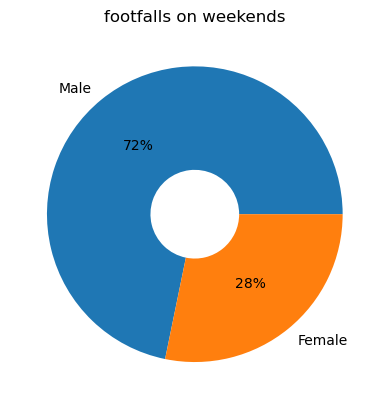

In [22]:
plt.figure()
plt.title("footfalls on weekends")
plt.pie(sp, labels = sp.index, explode = [0,0], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

12. What gender has higher footfalls on weekdays?

In [23]:
fdf = df[(df["day"] == "Fri") | (df["day"] == "Thur")]
print(fdf[["day","sex"]].value_counts())
sp = fdf["sex"].value_counts()

day   sex   
Thur  Female    32
      Male      30
Fri   Male      10
      Female     9
Name: count, dtype: int64


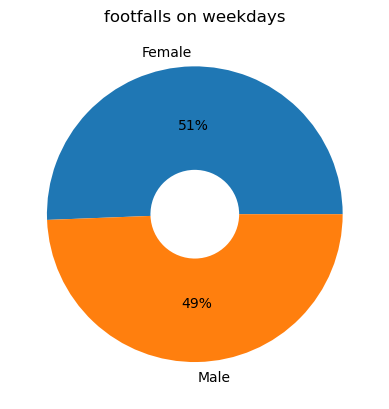

In [24]:
plt.figure()
plt.title("footfalls on weekdays")
plt.pie(sp, labels = sp.index, explode = [0,0], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

13. List top ten tippers.

In [25]:
df.sort_values("tip", ascending= False).iloc[0:10]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
214,28.17,6.50,Female,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
239,29.03,5.92,Male,No,Sat,Dinner,3
88,24.71,5.85,Male,No,Thur,Lunch,2


14. List top five tippers on weekends.

In [26]:
df[(df["day"] == "Sun") | (df["day"] == "Sat")].sort_values("tip", ascending= False).iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


15. Who are the generous tippers? - A smokers or a non-smokers? 

In [27]:
m = df.tip.mean()
df[df.tip > m]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2
234,15.53,3.00,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [28]:
sp = df[df.tip > m].smoker.value_counts()
sp

smoker
No     71
Yes    50
Name: count, dtype: int64

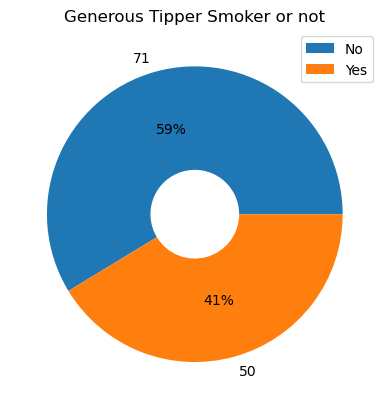

In [29]:
plt.figure()
plt.title("Generous Tipper Smoker or not")
plt.pie(sp, labels = sp.values, explode = [0,0], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.legend(sp.index)
plt.show()

16. Who are the generous tippers? - male or female?

In [30]:
sp = df[df.tip > m].sex.value_counts()
sp

sex
Male      82
Female    39
Name: count, dtype: int64

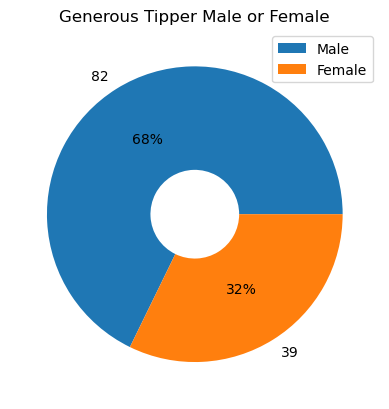

In [31]:
plt.figure()
plt.title("Generous Tipper Male or Female")
plt.pie(sp, labels = sp.values, explode = [0,0], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.legend(sp.index)
plt.show()

17. List top five female tippers. How many of them were smokers?

In [32]:
fd = df[df["sex"] == "Female"].sort_values("tip", ascending= False).iloc[0:5]
fd

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.50,Female,Yes,Sat,Dinner,3
52,34.81,5.20,Female,No,Sun,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
155,29.85,5.14,Female,No,Sun,Dinner,5
11,35.26,5.00,Female,No,Sun,Dinner,4


smoker
No     4
Yes    1
Name: count, dtype: int64


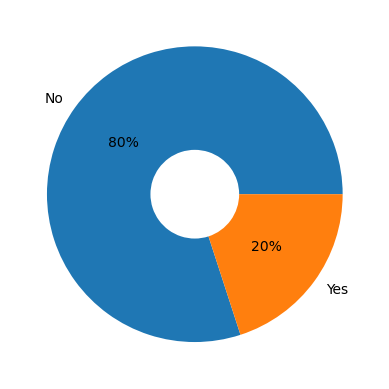

In [33]:
print(fd.smoker.value_counts())
sp = fd.smoker.value_counts()
plt.figure()
plt.pie(sp, labels = sp.index, explode = [0,0], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

18. List top five male tippers. What did they have - Lunch/Dinner?

In [34]:
fd = df[df["sex"] == "Male"].sort_values("tip", ascending= False).iloc[0:5]
fd

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6


time
Dinner    4
Lunch     1
Name: count, dtype: int64


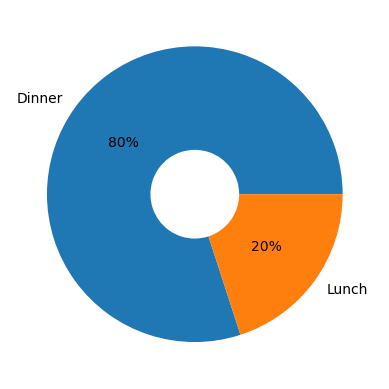

In [35]:
print(fd.time.value_counts())
sp = fd.time.value_counts()
plt.figure()
plt.pie(sp, labels = sp.index, explode = [0,0], autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

19. Create a new column - 'tip%'. It will contain the values of tips w.r.t total bills.

In [36]:
df["tip%"] = ((df["tip"] / df["total_bill"]) * 100).round(3)
df


,total_bill,tip,sex,smoker,day,time,size,tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.945
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054
2,21.01,3.50,Male,No,Sun,Dinner,3,16.659
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978
4,24.59,3.61,Female,No,Sun,Dinner,4,14.681
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.393
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820


20. Who came with larger party sizes - males or females?

In [37]:
f1 = df[df['size']>df['size'].mean()].sort_values('size',ascending=False)
f1

,total_bill,tip,sex,smoker,day,time,size,tip%
141,34.30,6.70,Male,No,Thur,Lunch,6,19.534
156,48.17,5.00,Male,No,Sun,Dinner,6,10.380
125,29.80,4.20,Female,No,Thur,Lunch,6,14.094
143,27.05,5.00,Female,No,Thur,Lunch,6,18.484
185,20.69,5.00,Male,No,Sun,Dinner,5,24.166
...,...,...,...,...,...,...,...,...
2,21.01,3.50,Male,No,Sun,Dinner,3,16.659
146,18.64,1.36,Female,No,Thur,Lunch,3,7.296
152,17.26,2.74,Male,No,Sun,Dinner,3,15.875
162,16.21,2.00,Female,No,Sun,Dinner,3,12.338


sex
Male      58
Female    26
Name: count, dtype: int64


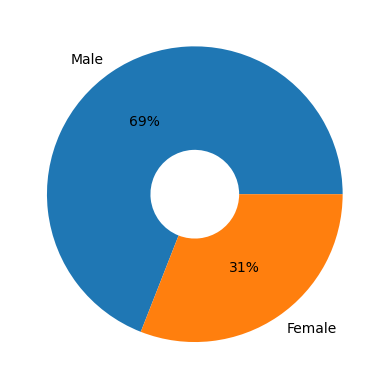

In [38]:
sp = f1['sex'].value_counts()
print(sp)
plt.figure()
plt.pie(sp, labels = sp.index, autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

21. Who came with larger party sizes - smokers or non-smokers?

smoker
No     59
Yes    25
Name: count, dtype: int64


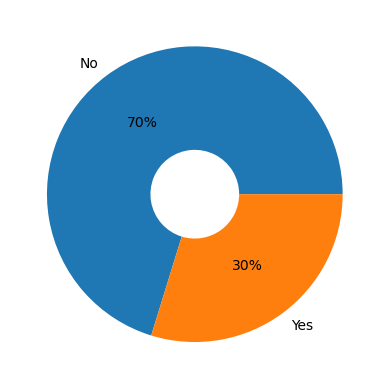

In [39]:
sp = f1['smoker'].value_counts()
print(sp)
plt.figure()
plt.pie(sp, labels = sp.index, autopct = '%0.0f%%', wedgeprops = {'width' : 0.7})
plt.show()

22. What is the maximum tip given by a non-smoker female? 
23. What is the maximum tip given by a smoker male?

In [40]:
df[(df["sex"] == "Female") & (df["smoker"] == "No")].sort_values("tip",ascending=False).iloc[[0]]

,total_bill,tip,sex,smoker,day,time,size,tip%
52,34.81,5.2,Female,No,Sun,Dinner,4,14.938


In [41]:
df[(df["sex"] == "Female") & (df["smoker"] == "No")].tip.max()

5.2

In [42]:
df[(df["sex"] == "Male") & (df["smoker"] == "Yes")].sort_values("tip",ascending=False).iloc[[0]]

,total_bill,tip,sex,smoker,day,time,size,tip%
170,50.81,10.0,Male,Yes,Sat,Dinner,3,19.681


In [43]:
df[(df["sex"] == "Male") & (df["smoker"] == "Yes")].tip.max()

10.0

24. List top five customers who has highest tip-to-bill ratio.

In [44]:
df.sort_values("tip%",ascending=False).iloc[0:5]

,total_bill,tip,sex,smoker,day,time,size,tip%
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573
232,11.61,3.39,Male,No,Sat,Dinner,2,29.199
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.054


25. Show distributions of total bill and tips. What conclusion can be drawn from it?

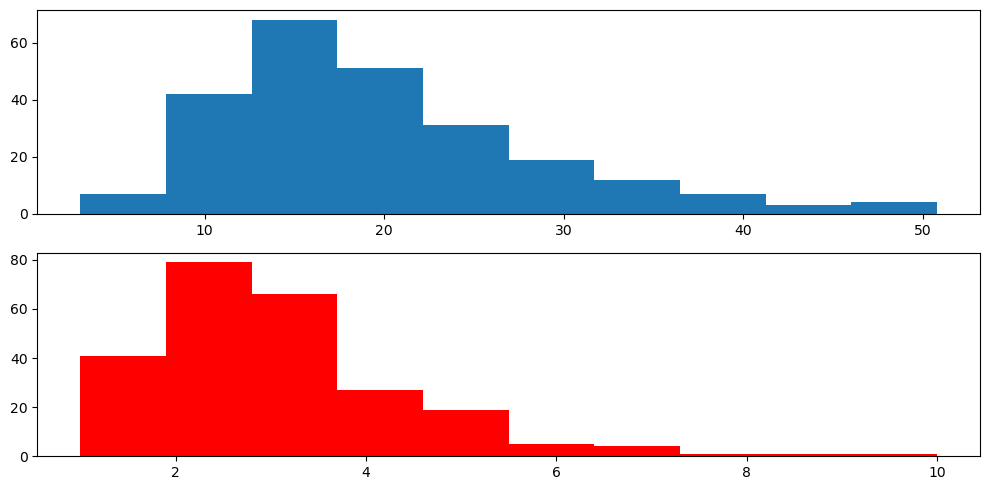

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(211)
plt.hist(df.total_bill,bins=10)
plt.subplot(212)
plt.hist(df.tip,bins=10,color="r")
plt.tight_layout()
plt.show()